In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import re
import pandas as pd
import numpy as np
import pymc
#from scipy.special import gamma as GammaFunction
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os.path
import attila_utils
import mwm
from cellbayesassay import idatas_to_netcdf

In [2]:
treatments_CO26990 = {
    'A': 'Saline WT',
    'B': 'Saline TG',
    'C': 'Amiloride TG',
}

treatments_CO28152 = {
    'A': 'Amiloride TG',
    'B': 'HCQ TG',
    'C': 'HCQ nano TG',
    'D': 'Saline TG',
    'E': 'R-HCQ TG',
    'F': 'S-HCQ TG',
    'G': 'TUDCA TG',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

treatments_CO28154 = {
    'A': 'Saline TG',
    #'B': 'Amiloride + HCQ TG', # absent from data
    'C': 'TUDCA + HCQ TG',
    'D': 'Arundine low dose TG',
    'E': 'Arundine mid dose TG',
    'F': 'Arundine high dose TG',
    'G': 'Vehicle (Arundine) TG',
    'H': 'Arundine high dose WT',
    #'I': 'Amiloride + HCQ WT', # absent from data
    'J': 'TUDCA + HCQ WT',
    'K': 'Saline WT',
    'L': 'Vehicle (Arundine) WT',
}


fpath_CO26990 = '../../resources/QPS/5xFAD-mouse/CO26990-behavioral-data-cleaned.xlsx'
fpath_CO28152 = '../../resources/QPS/5xFAD-mouse/CO28152-behavioral-data-cleaned.xlsx'
fpath_CO28154 = '../../resources/QPS/5xFAD-mouse/CO28154-behavioral-data-cleaned.xlsx'

fpathl = [fpath_CO26990, fpath_CO28152, fpath_CO28154]
treatmentsl = [treatments_CO26990, treatments_CO28152, treatments_CO28154]
sheet_namel = ['rawdata MWM day 1-4', 'rawdata MWM day 1-4', 'MWM day 1-4']

Z = zip(fpathl, treatmentsl, sheet_namel)

data_CO26990, data_CO28152, data_CO28154 = [mwm.read_data_train(f, t, sheet_name=s) for f, t, s in Z]
data_CO28154.head()

Latency  Distance (cm)  Velocity (cm/s)  \
cohort group sex irn   day                                              
II     A     f   15721 Day 1    52.74     1015.22075        19.086425   
                       Day 2    60.08     1088.82750        18.147125   
                       Day 3    50.68      915.51800        16.998050   
                       Day 4    42.36      683.79500        14.696975   
                 15725 Day 1    54.10      994.20225        18.210400   

                              Thigmotaxis  Floating Cohort Group Sex    IRN  \
cohort group sex irn   day                                                    
II     A     f   15721 Day 1    41.474975  1.507714     II     A   f  15721   
                       Day 2    58.022650  0.499334     II     A   f  15721   
                       Day 3    37.496623  3.224045     II     A   f  15721   
                       Day 4    17.884725  4.353538     II     A   f  15721   
                 15725 Day 1    52.676225  1.860057     II     A   f  15725   

                              Day  Condition Status  
cohort group sex irn   day                           
II     A     f   15721 Day 1  1.0  Saline TG   none  
                       Day 2  2.0  Saline TG  right  
                       Day 3  3.0  Saline TG   none  
                       Day 4  4.0  Saline TG   none  
                 15725 Day 1  1.0  Saline TG   none

In [3]:
plotd_CO26990 = {
    'Amiloride 10 TG': (data_CO28152, ['Saline TG', 'Amiloride TG', 'Saline WT']),
}

latency-Amiloride-10-TG


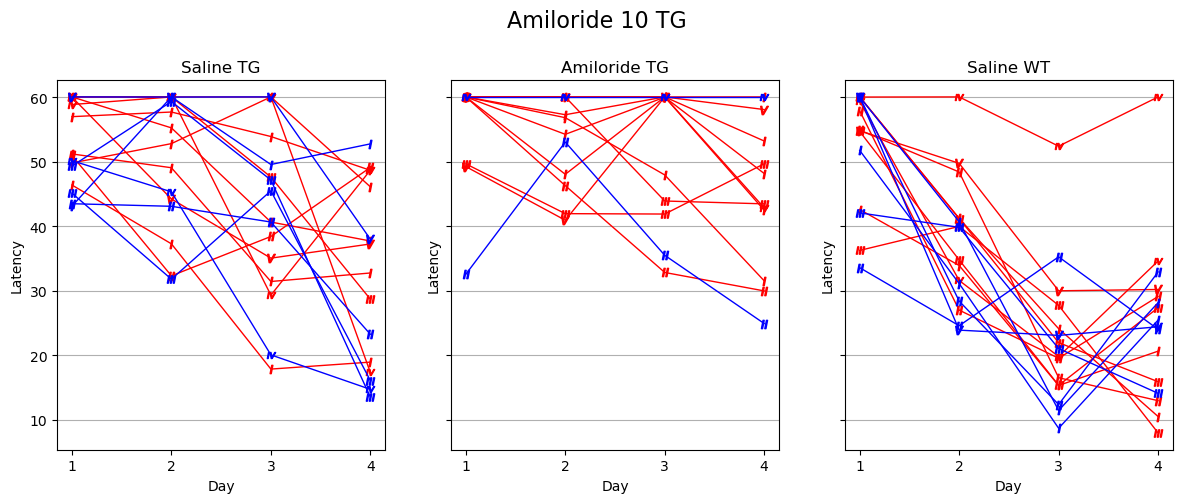

In [4]:
for k, v in plotd_CO26990.items():
    fig, ax = mwm.escape_latency_plotter(k, *v)
    bname = 'latency-' + re.sub('\W+', '-', k)
    print(bname)
    attila_utils.savefig(fig, bname)

In [5]:
plotd_CO28152 = {
    'Amiloride 12 TG': (data_CO28152, ['Saline TG', 'Amiloride TG', 'Saline WT']),
    'HCQ TG': (data_CO28152, ['Saline TG', 'HCQ TG', 'Saline WT']),
    'HCQ nano TG': (data_CO28152, ['Saline TG', 'HCQ nano TG', 'Saline WT']),
    'R-HCQ TG': (data_CO28152, ['Saline TG', 'R-HCQ TG', 'Saline WT']),
    'S-HCQ TG': (data_CO28152, ['Saline TG', 'S-HCQ TG', 'Saline WT']),
    'TUDCA TG': (data_CO28152, ['Saline TG', 'TUDCA TG', 'Saline WT']),
    'TUDCA WT': (data_CO28152, ['Saline WT', 'TUDCA WT', 'DMSO WT']),
}

latency-Amiloride-12-TG
latency-HCQ-TG
latency-HCQ-nano-TG
latency-R-HCQ-TG
latency-S-HCQ-TG
latency-TUDCA-TG
latency-TUDCA-WT


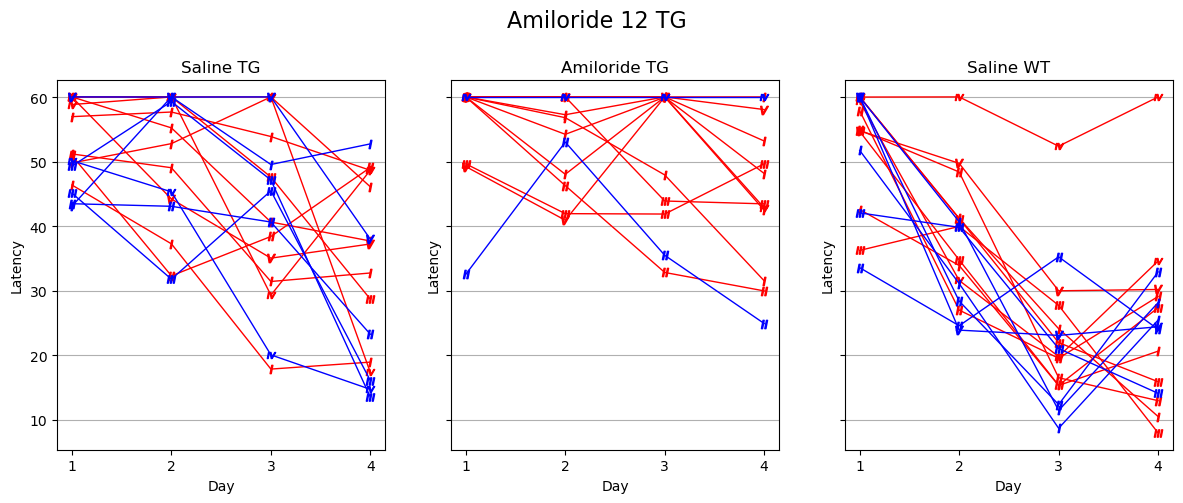

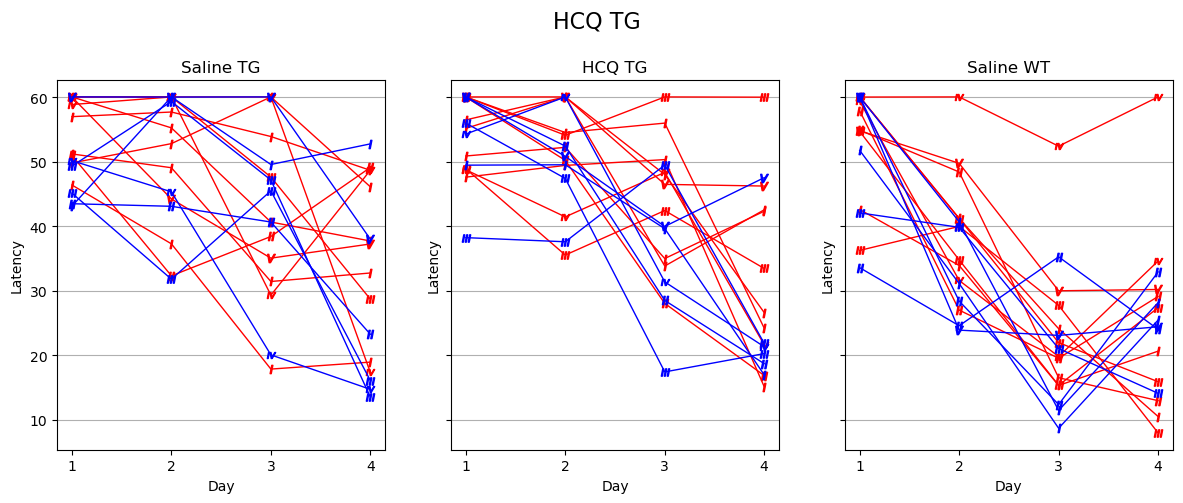

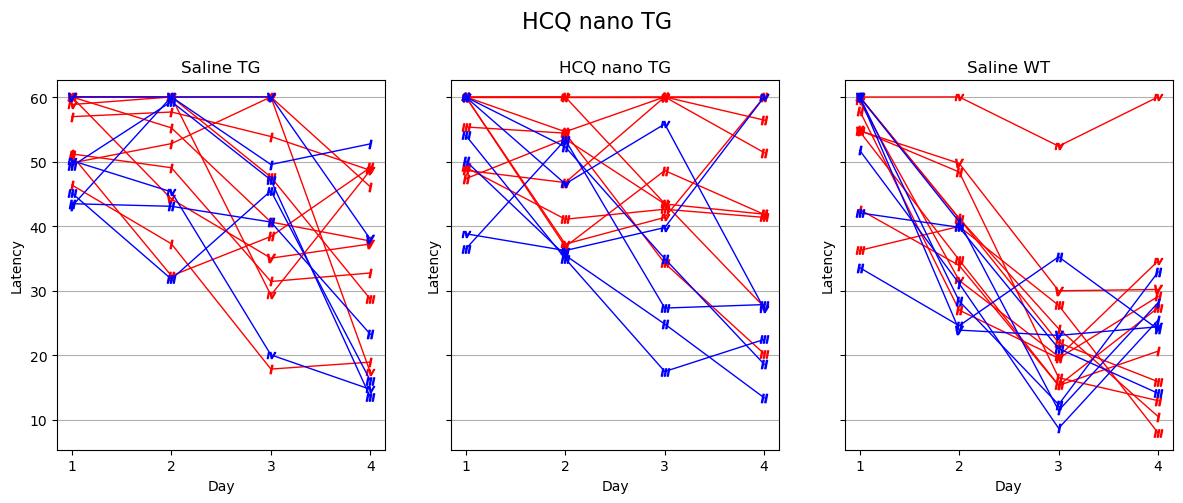

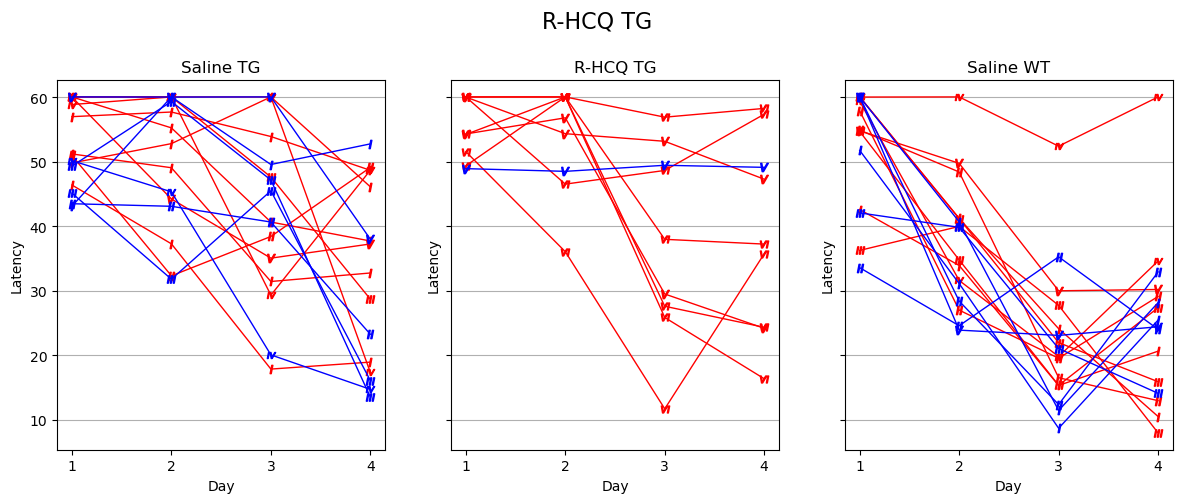

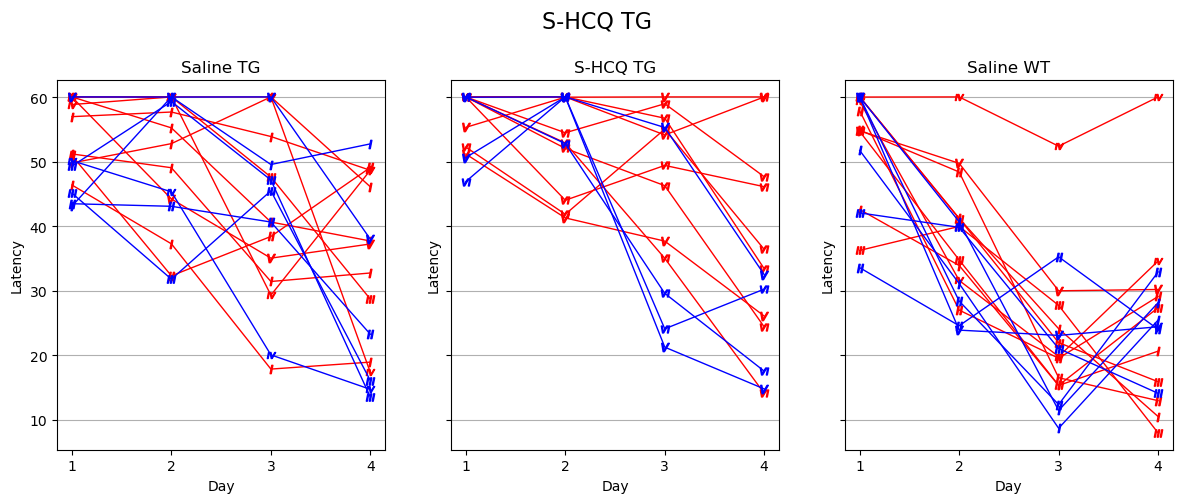

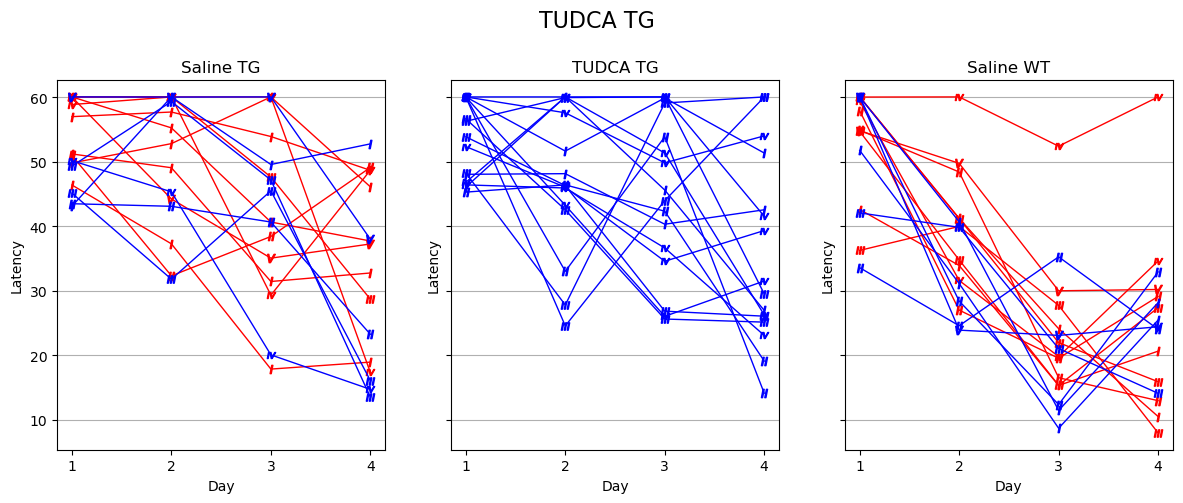

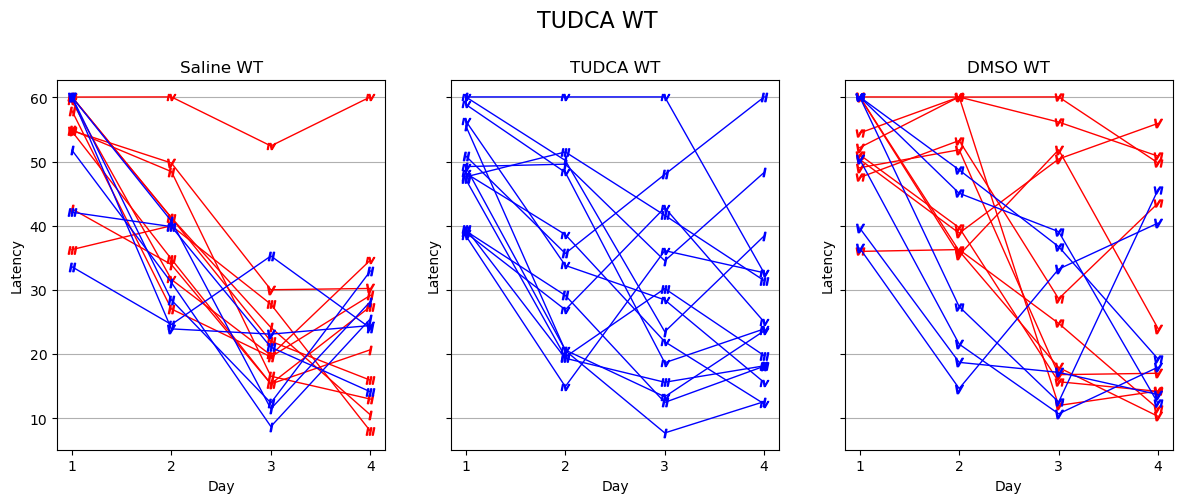

In [6]:
for k, v in plotd_CO28152.items():
    fig, ax = mwm.escape_latency_plotter(k, *v)
    bname = 'latency-' + re.sub('\W+', '-', k)
    print(bname)
    attila_utils.savefig(fig, bname)

In [7]:
plotd_CO28154 = {
    #'Amiloride + HCQ TG': (data_CO28154, ['Saline TG', 'Amiloride + HCQ TG', 'Saline WT']), # absent from data
    'TUDCA + HCQ TG': (data_CO28154, ['Saline TG', 'TUDCA + HCQ TG', 'Saline WT']),
    'Arundine low dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine low dose TG', 'Vehicle (Arundine) WT']),
    'Arundine mid dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine mid dose TG', 'Vehicle (Arundine) WT']),
    'Arundine high dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine high dose TG', 'Vehicle (Arundine) WT']),
    'Arundine high dose WT': (data_CO28154, ['Vehicle (Arundine) WT', 'Arundine high dose WT', 'Vehicle (Arundine) TG']),
    #'Amiloride + HCQ WT': (data_CO28154, ['Saline WT', 'Amiloride + HCQ WT', 'Saline TG']), # absent from data
    'TUDCA + HCQ WT': (data_CO28154, ['Saline WT', 'TUDCA + HCQ WT', 'Saline TG']),
}


latency-TUDCA-HCQ-TG
latency-Arundine-low-dose-TG
latency-Arundine-mid-dose-TG
latency-Arundine-high-dose-TG
latency-Arundine-high-dose-WT
latency-TUDCA-HCQ-WT


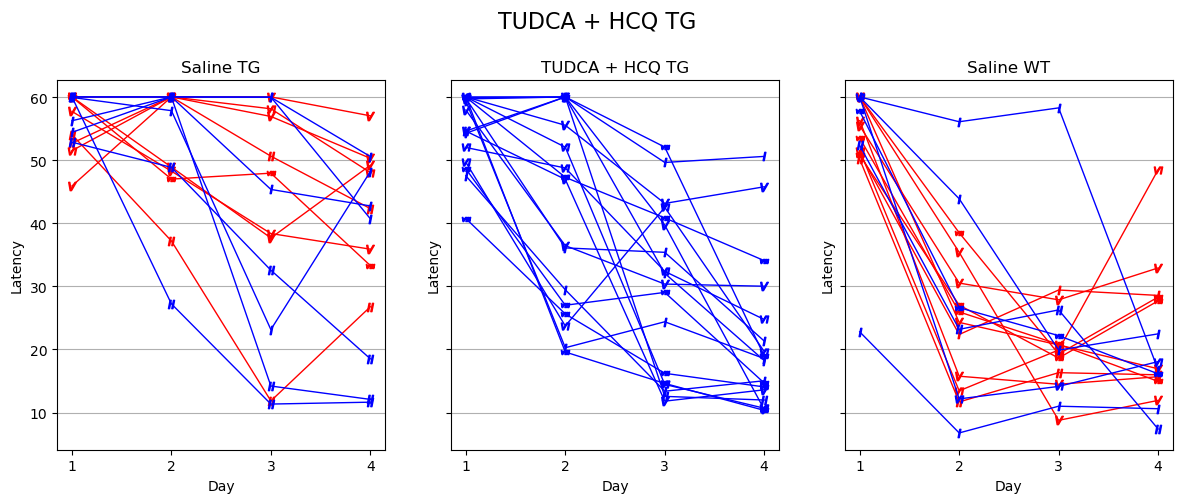

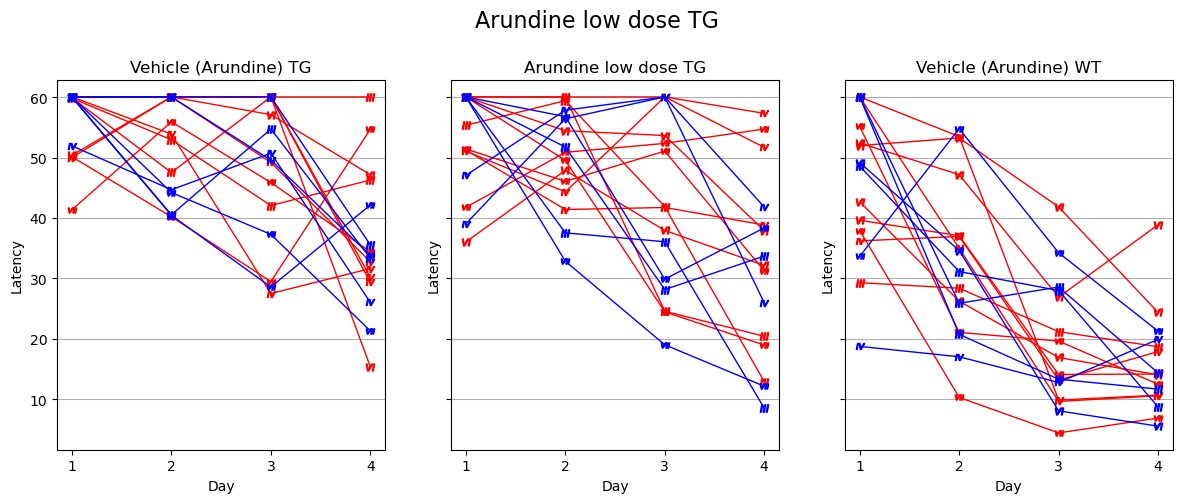

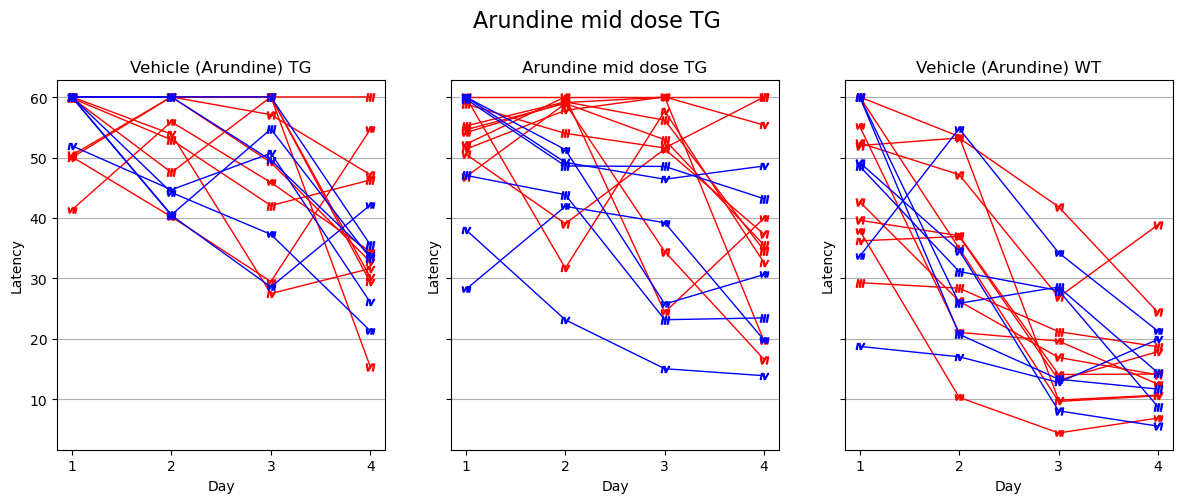

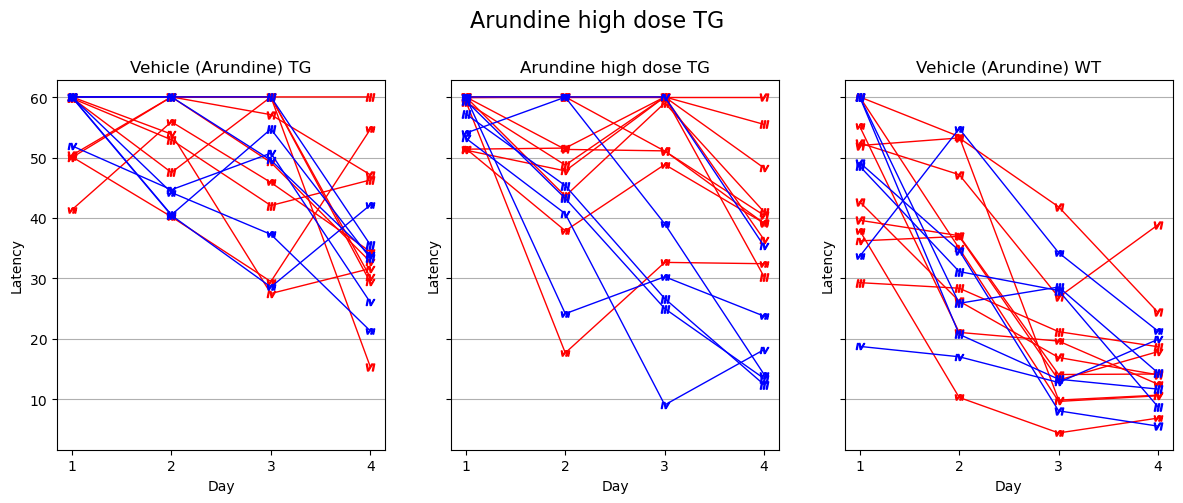

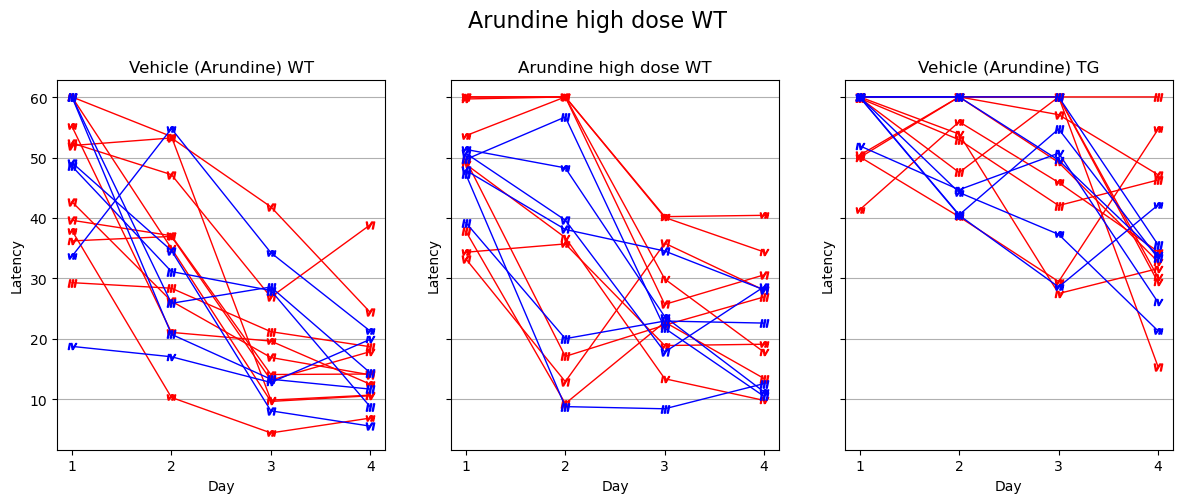

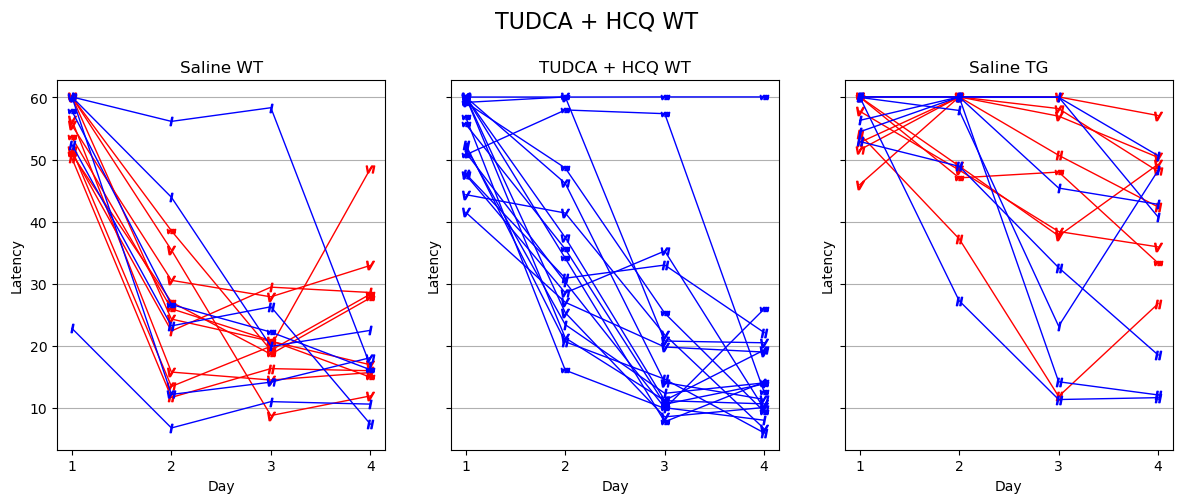

In [8]:
for k, v in plotd_CO28154.items():
    fig, ax = mwm.escape_latency_plotter(k, *v)
    bname = 'latency-' + re.sub('\W+', '-', k)
    print(bname)
    attila_utils.savefig(fig, bname)

## Fit data

In [9]:
def fit_or_read_fitted(experimentsd, subdir, maindir='../../results/2024-06-04-5xfad-behavior-CO28154/'):
    if not os.path.exists(os.path.join(maindir, subdir, 'fpaths.csv')):
        idatas = mwm.fit_multiple(experimentsd)
        fpathdf = idatas_to_netcdf(idatas, subdir, maindir=maindir)
        print('idatas written to netcdf')
    else:
        idatas = mwm.idatas_from_netcdf(subdir=subdir, maindir=maindir)
        print('idatas read from netcdf')
    return(idatas)

seedl = [21947, 21949, 21976, 22021]

In [10]:
experiments3_CO26990 = {
    'Amiloride 10 TG': (data_CO28152, ['Saline TG', 'Amiloride TG', 'Saline WT'], seedl),
}
idatas3_CO26990 = fit_or_read_fitted(experiments3_CO26990, 'idatas3_CO26990', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [11]:
experiments2_CO26990 = {
    'WT': (data_CO28152, ['Saline TG', 'Saline WT'], seedl),
    'Amiloride 10 TG': (data_CO28152, ['Saline TG', 'Amiloride TG'], seedl),
}
idatas2_CO26990 = fit_or_read_fitted(experiments2_CO26990, 'idatas2_CO26990', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [12]:
experiments3_CO28152 = {
    'Amiloride 12 TG': (data_CO28152, ['Saline TG', 'Amiloride TG', 'Saline WT'], seedl),
    'HCQ TG': (data_CO28152, ['Saline TG', 'HCQ TG', 'Saline WT'], seedl),
    'HCQ nano TG': (data_CO28152, ['Saline TG', 'HCQ nano TG', 'Saline WT'], seedl),
    'R-HCQ TG': (data_CO28152, ['Saline TG', 'R-HCQ TG', 'Saline WT'], seedl),
    'S-HCQ TG': (data_CO28152, ['Saline TG', 'S-HCQ TG', 'Saline WT'], seedl),
    'TUDCA TG': (data_CO28152, ['Saline TG', 'TUDCA TG', 'Saline WT'], seedl),
    'TUDCA WT': (data_CO28152, ['Saline WT', 'TUDCA TG', 'Saline TG'], seedl),
}
idatas3_CO28152 = fit_or_read_fitted(experiments3_CO28152, 'idatas3_CO28152', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [13]:
experiments2_CO28152 = {
    'WT': (data_CO28152, ['Saline TG', 'Saline WT'], seedl),
    'Amiloride 12 TG': (data_CO28152, ['Saline TG', 'Amiloride TG'], seedl),
    'HCQ TG': (data_CO28152, ['Saline TG', 'HCQ TG'], seedl),
    'HCQ nano TG': (data_CO28152, ['Saline TG', 'HCQ nano TG'], seedl),
    'R-HCQ TG': (data_CO28152, ['Saline TG', 'R-HCQ TG'], seedl),
    'S-HCQ TG': (data_CO28152, ['Saline TG', 'S-HCQ TG'], seedl),
    'TUDCA TG': (data_CO28152, ['Saline TG', 'TUDCA TG'], seedl),
    'TUDCA WT': (data_CO28152, ['Saline WT', 'TUDCA TG'], seedl),
}
idatas2_CO28152 = fit_or_read_fitted(experiments2_CO28152, 'idatas2_CO28152', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [14]:
experiments_CO28152 = {
    'all': (data_CO28152,
            [
                'Saline TG',
                'Amiloride TG',
                'HCQ TG',
                'HCQ nano TG',
                'R-HCQ TG',
                'S-HCQ TG',
                'TUDCA TG',
                'Saline WT',
                ], seedl),
    'all WT': (data_CO28152, ['Saline WT', 'TUDCA WT'], seedl),
}
idatas_CO28152 = fit_or_read_fitted(experiments_CO28152, 'idatas_CO28152', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [15]:
experiments3_CO28154 = {
    'TUDCA + HCQ TG': (data_CO28154, ['Saline TG', 'TUDCA + HCQ TG', 'Saline WT'], seedl),
    'Arundine low dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine low dose TG', 'Vehicle (Arundine) WT'], seedl),
    'Arundine mid dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine mid dose TG', 'Vehicle (Arundine) WT'], seedl),
    'Arundine high dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine high dose TG', 'Vehicle (Arundine) WT'], seedl),
    'Arundine high dose WT': (data_CO28154, ['Vehicle (Arundine) WT', 'Arundine high dose WT', 'Vehicle (Arundine) TG'], seedl),
    'TUDCA + HCQ WT': (data_CO28154, ['Saline WT', 'TUDCA + HCQ WT', 'Saline TG'], seedl),
}
idatas3_CO28154 = fit_or_read_fitted(experiments3_CO28154, 'idatas3_CO28154', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [16]:
experiments2_CO28154 = {
    'WT': (data_CO28154, ['Saline TG', 'Saline WT'], seedl),
    'TUDCA + HCQ TG': (data_CO28154, ['Saline TG', 'TUDCA + HCQ TG'], seedl),
    'Arundine low dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine low dose TG'], seedl),
    'Arundine mid dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine mid dose TG'], seedl),
    'Arundine high dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine high dose TG'], seedl),
    'Arundine high dose WT': (data_CO28154, ['Vehicle (Arundine) WT', 'Arundine high dose WT'], seedl),
    'TUDCA + HCQ WT': (data_CO28154, ['Saline WT', 'TUDCA + HCQ WT'], seedl),
}
idatas2_CO28154 = fit_or_read_fitted(experiments2_CO28154, 'idatas2_CO28154', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [17]:
experiments_CO28154 = {
    'TUDCA + HCQ TG': (data_CO28154,
                    [
                        'Saline TG',
                        'TUDCA + HCQ TG',
                        'Saline WT',
                    ], seedl),
    'Arundine TG': (data_CO28154,
                 [
                     'Vehicle (Arundine) TG',
                     'Arundine low dose TG',
                     'Arundine mid dose TG',
                     'Arundine high dose TG',
                     'Vehicle (Arundine) WT'
                 ], seedl),
    'TUDCA + HCQ WT': (data_CO28154,
                    [
                        'Saline WT',
                        'TUDCA + HCQ WT',
                    ], seedl),
    'Arundine WT': (data_CO28154,
                 [
                     'Vehicle (Arundine) WT',
                     'Arundine high dose WT',
                 ], seedl),
}
idatas_CO28154 = fit_or_read_fitted(experiments_CO28154, 'idatas_CO28154', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


## MCMC diagnostics

### idatas3_CO28154

In [18]:
mwm.get_diagnostics(idatas_CO28152, az.ess)

In [19]:
mwm.get_diagnostics(idatas2_CO28152, az.ess)

In [20]:
mwm.get_diagnostics(idatas_CO28152, az.rhat)

In [21]:
mwm.get_diagnostics(idatas2_CO28152, az.rhat)

In [22]:
mwm.get_diagnostics(idatas_CO28152, az.mcse)

In [23]:
mwm.get_diagnostics(idatas2_CO28152, az.mcse)

## Sampled curves

['TUDCA + HCQ TG', 'Saline WT']


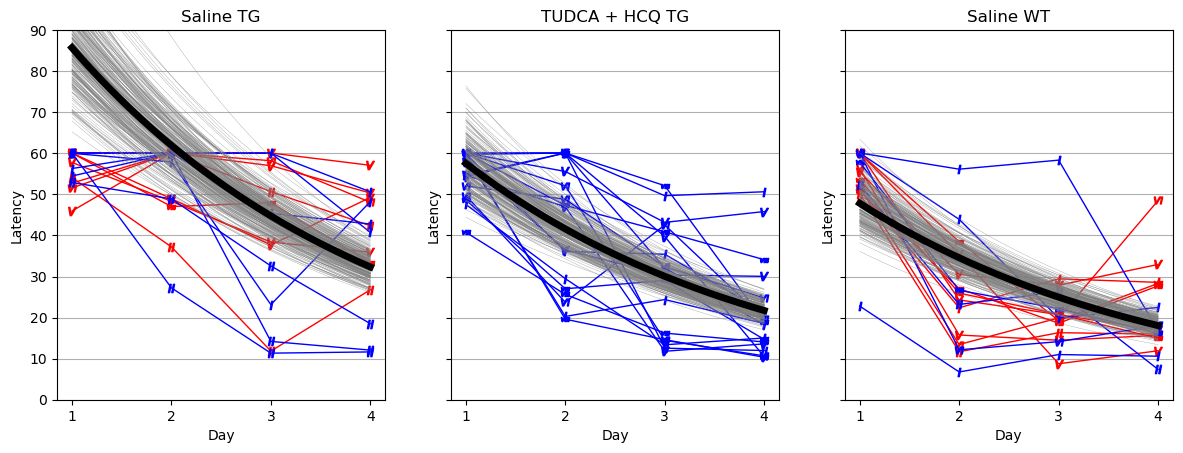

In [36]:
def model_escape_latency_plotter(idata, lvl=['Saline TG', 'TUDCA + HCQ TG', 'Saline WT'], ref_lvl='Saline TG', log_yscale=False, exper=''):
    treatment_lvl = lvl.copy()
    treatment_lvl.remove(ref_lvl)
    print(treatment_lvl)
    fig, ax = mwm.escape_latency_plotter(exper, data_CO28154, lvl=lvl)
    summary = az.summary(idata)
    chain = 0
    xx = np.linspace(1, 4, 201)
    for level, axi in zip(lvl, ax):
        for i in np.arange(0, idata.posterior.dims['draw'], step=4):
            Intercept = idata.posterior['Intercept'][chain][i].to_numpy()
            Day = idata.posterior['Day'][chain][i].to_numpy()
            Condition = idata.posterior['C(Condition, levels=lvl)'][chain][i].to_numpy()
            Condition = [0] + list(Condition)
            prefix = '^C\(Condition, levels=lvl\)\['
            ix = [re.sub(prefix + '(.*)\]$','\\1', x) for x in summary.index if re.match(prefix + '.*$', x)]
            ix = [ref_lvl] + ix
            s_Condition = pd.Series(Condition, index=ix)
            s_Condition = s_Condition.loc[lvl]
            yy = np.exp(Intercept + s_Condition.loc[level] + Day * xx)
            axi.plot(xx, yy, linewidth=0.2, color='gray')
        Intercept = summary.loc['Intercept', 'mean']
        Day = summary.loc['Day', 'mean']
        if level == ref_lvl:
            cond = 0
        else:
            cond = summary.loc['C(Condition, levels=lvl)[' + level + ']', 'mean']
        yy = np.exp(Intercept + cond + Day * xx)
        axi.plot(xx, yy, linewidth=5, color='k')
        if log_yscale:
            axi.set_yscale('log')
        axi.grid(visible=True, axis='y', which='both')
        axi.set_ylim(0, 90)
    return((fig, ax))

idata = idatas_CO28154.loc['TUDCA + HCQ TG']
lvl = ['Saline TG', 'TUDCA + HCQ TG', 'Saline WT']
fig, ax = model_escape_latency_plotter(idata, lvl=lvl, ref_lvl='Saline TG', log_yscale=False)

['TUDCA + HCQ TG', 'Saline WT']


/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_55434/3249728462.py:33: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axi.set_ylim(0, 90)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_55434/3249728462.py:33: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axi.set_ylim(0, 90)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_55434/3249728462.py:33: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axi.set_ylim(0, 90)


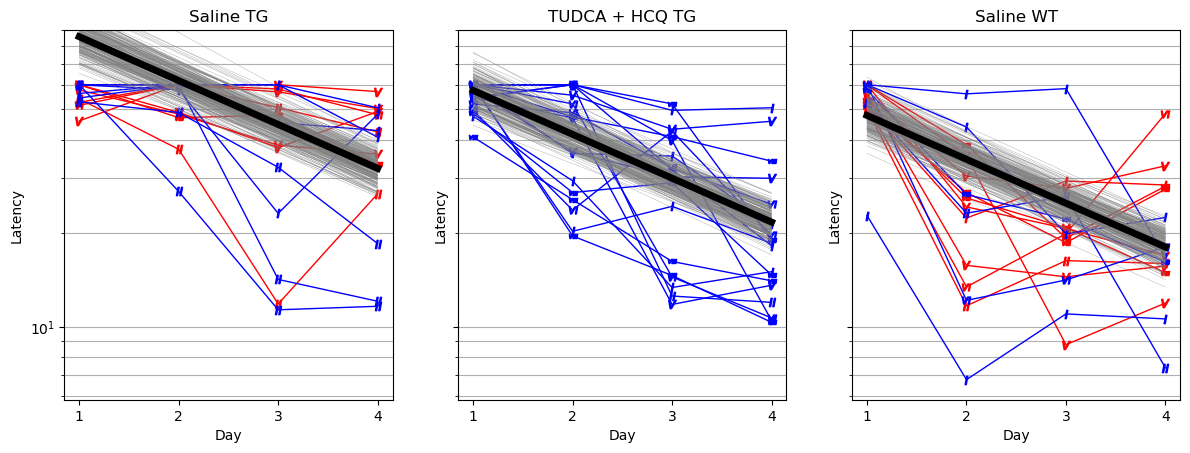

In [37]:
fig, ax = model_escape_latency_plotter(idata, lvl=lvl, ref_lvl='Saline TG', log_yscale=True)

['S-HCQ TG', 'Saline WT']


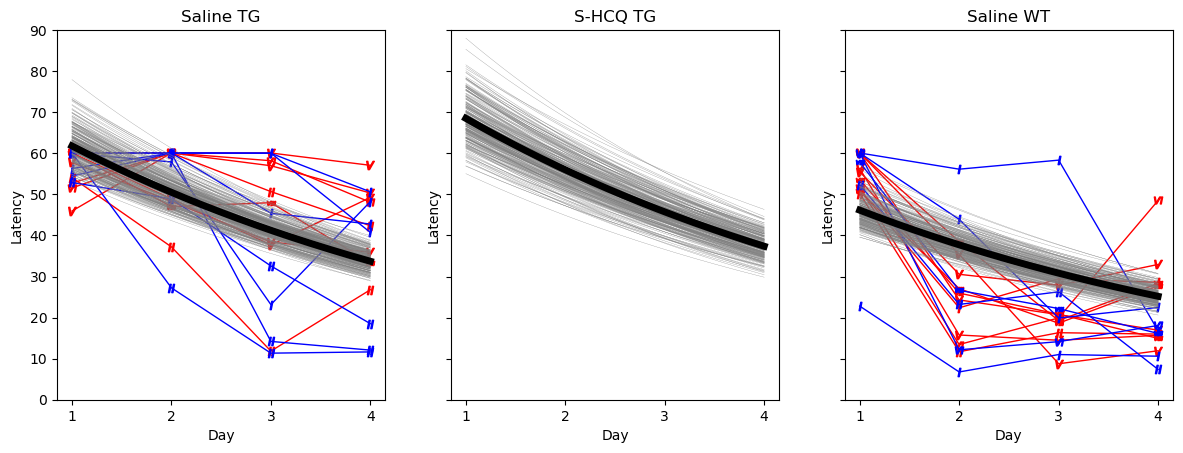

In [26]:
idata = idatas_CO28152.loc['all']
lvl = [
    'Saline TG',
    'S-HCQ TG',
    'Saline WT',
]
fig, ax = model_escape_latency_plotter(idata, lvl=lvl, ref_lvl='Saline TG', log_yscale=False)

##

In [27]:
def get_summary(idatas, treatment=True):
    var_names = 'C(Condition, levels=lvl)'
    if not treatment:
        var_names = idatas.iloc[0].posterior.to_dataframe().drop([var_names, '1|IRN'], axis=1).columns.to_list()
    def helper(exper):
        idata = idatas.loc[exper]
        df = az.summary(idata, var_names=var_names, hdi_prob=0.95)
        ix0 = df.index.to_list()
        ix0 = [x.replace('C(Condition, levels=lvl)[', '').replace(']', '') for x in ix0]
        ix = pd.MultiIndex.from_product([[exper], ix0])
        df = pd.DataFrame(df.to_numpy(), columns=df.columns, index=ix)
        return(df)
    l = [helper(exper) for exper in idatas.index]
    summary = pd.concat(l, axis=0)
    return(summary)

In [28]:
idatas_CO28152.iloc[0].posterior.to_dataframe().columns

Index(['Intercept', 'C(Condition, levels=lvl)', 'Day',
       'censored(Latency, Status)_alpha', '1|IRN_sigma', '1|IRN'],
      dtype='object')

In [29]:
get_summary(idatas3_CO26990)

mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  \
Amiloride 10 TG Amiloride TG  0.298  0.117     0.074      0.525      0.003   
                Saline WT    -0.299  0.106    -0.512     -0.091      0.003   

                              mcse_sd  ess_bulk  ess_tail  r_hat  
Amiloride 10 TG Amiloride TG    0.002    1541.0    2563.0   1.00  
                Saline WT       0.002    1221.0    1876.0   1.01

In [30]:
get_summary(idatas_CO28152)

mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
all    Amiloride TG  0.282  0.109     0.065      0.496      0.003    0.002   
       HCQ TG       -0.028  0.095    -0.208      0.163      0.003    0.002   
       HCQ nano TG   0.092  0.095    -0.102      0.272      0.003    0.002   
       R-HCQ TG      0.066  0.113    -0.148      0.293      0.003    0.002   
       S-HCQ TG      0.103  0.103    -0.093      0.307      0.003    0.002   
       TUDCA TG      0.033  0.094    -0.151      0.213      0.003    0.002   
       Saline WT    -0.292  0.095    -0.470     -0.107      0.003    0.002   
all WT TUDCA WT      0.021  0.121    -0.206      0.274      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
all    Amiloride TG    1324.0    1591.0   1.00  
       HCQ TG           971.0    1431.0   1.01  
       HCQ nano TG     1186.0    1746.0   1.00  
       R-HCQ TG        1151.0    1728.0   1.00  
       S-HCQ TG        1139.0    1807.0   1.00  
       TUDCA TG        1012.0    1666.0   1.00  
       Saline WT       1092.0    1470.0   1.00  
all WT TUDCA WT        1748.0    2170.0   1.00

In [31]:
get_summary(idatas_CO28152, treatment=False)

mean     sd  hdi_2.5%  hdi_97.5%  \
all    Intercept                        4.326  0.079     4.177      4.480   
       Day                             -0.202  0.015    -0.232     -0.174   
       censored(Latency, Status)_alpha  3.673  0.180     3.339      4.041   
       1|IRN_sigma                      0.216  0.026     0.165      0.267   
all WT Intercept                        4.149  0.110     3.941      4.369   
       Day                             -0.255  0.029    -0.308     -0.195   
       censored(Latency, Status)_alpha  3.095  0.268     2.581      3.624   
       1|IRN_sigma                      0.275  0.056     0.175      0.389   

                                        mcse_mean  mcse_sd  ess_bulk  \
all    Intercept                            0.003    0.002     999.0   
       Day                                  0.000    0.000    3315.0   
       censored(Latency, Status)_alpha      0.003    0.002    3038.0   
       1|IRN_sigma                          0.001    0.001    1241.0   
all WT Intercept                            0.002    0.002    2022.0   
       Day                                  0.000    0.000    3920.0   
       censored(Latency, Status)_alpha      0.004    0.003    3646.0   
       1|IRN_sigma                          0.001    0.001    1474.0   

                                        ess_tail  r_hat  
all    Intercept                          1417.0    1.0  
       Day                                2941.0    1.0  
       censored(Latency, Status)_alpha    3153.0    1.0  
       1|IRN_sigma                        2144.0    1.0  
all WT Intercept                          2585.0    1.0  
       Day                                3089.0    1.0  
       censored(Latency, Status)_alpha    2507.0    1.0  
       1|IRN_sigma                        2215.0    1.0

In [32]:
get_summary(idatas_CO28154)

mean     sd  hdi_2.5%  hdi_97.5%  \
TUDCA + HCQ TG TUDCA + HCQ TG        -0.398  0.118    -0.635     -0.163   
               Saline WT             -0.583  0.125    -0.826     -0.335   
Arundine TG    Arundine low dose TG  -0.140  0.105    -0.347      0.064   
               Arundine mid dose TG  -0.151  0.106    -0.362      0.050   
               Arundine high dose TG -0.099  0.109    -0.310      0.116   
               Vehicle (Arundine) WT -0.681  0.106    -0.898     -0.487   
TUDCA + HCQ WT TUDCA + HCQ WT        -0.006  0.137    -0.247      0.277   
Arundine WT    Arundine high dose WT  0.206  0.116    -0.016      0.434   

                                      mcse_mean  mcse_sd  ess_bulk  ess_tail  \
TUDCA + HCQ TG TUDCA + HCQ TG             0.003    0.002    1174.0    2022.0   
               Saline WT                  0.004    0.003    1164.0    1800.0   
Arundine TG    Arundine low dose TG       0.003    0.002    1317.0    1871.0   
               Arundine mid dose TG       0.003    0.002    1119.0    2215.0   
               Arundine high dose TG      0.003    0.002    1157.0    1751.0   
               Vehicle (Arundine) WT      0.003    0.002     987.0    1608.0   
TUDCA + HCQ WT TUDCA + HCQ WT             0.004    0.002    1509.0    2321.0   
Arundine WT    Arundine high dose WT      0.003    0.002    1819.0    2271.0   

                                      r_hat  
TUDCA + HCQ TG TUDCA + HCQ TG           1.0  
               Saline WT                1.0  
Arundine TG    Arundine low dose TG     1.0  
               Arundine mid dose TG     1.0  
               Arundine high dose TG    1.0  
               Vehicle (Arundine) WT    1.0  
TUDCA + HCQ WT TUDCA + HCQ WT           1.0  
Arundine WT    Arundine high dose WT    1.0

In [33]:
get_summary(idatas_CO28154, treatment=False)

mean     sd  hdi_2.5%  \
TUDCA + HCQ TG Intercept                        4.776  0.118     4.543   
               Day                             -0.325  0.026    -0.377   
               censored(Latency, Status)_alpha  2.892  0.210     2.476   
               1|IRN_sigma                      0.268  0.049     0.173   
Arundine TG    Intercept                        4.587  0.098     4.402   
               Day                             -0.241  0.021    -0.285   
               censored(Latency, Status)_alpha  3.147  0.186     2.794   
               1|IRN_sigma                      0.220  0.036     0.153   
TUDCA + HCQ WT Intercept                        4.396  0.140     4.144   
               Day                             -0.406  0.034    -0.473   
               censored(Latency, Status)_alpha  2.528  0.215     2.117   
               1|IRN_sigma                      0.324  0.066     0.197   
Arundine WT    Intercept                        4.137  0.113     3.930   
               Day                             -0.352  0.033    -0.420   
               censored(Latency, Status)_alpha  2.815  0.241     2.322   
               1|IRN_sigma                      0.256  0.058     0.150   

                                                hdi_97.5%  mcse_mean  mcse_sd  \
TUDCA + HCQ TG Intercept                            5.006      0.003    0.002   
               Day                                 -0.275      0.000    0.000   
               censored(Latency, Status)_alpha      3.287      0.004    0.003   
               1|IRN_sigma                          0.366      0.001    0.001   
Arundine TG    Intercept                            4.777      0.003    0.002   
               Day                                 -0.203      0.000    0.000   
               censored(Latency, Status)_alpha      3.509      0.003    0.002   
               1|IRN_sigma                          0.294      0.001    0.001   
TUDCA + HCQ WT Intercept                            4.689      0.003    0.002   
               Day                                 -0.339      0.001    0.000   
               censored(Latency, Status)_alpha      2.947      0.004    0.003   
               1|IRN_sigma                          0.449      0.002    0.001   
Arundine WT    Intercept                            4.374      0.002    0.002   
               Day                                 -0.291      0.001    0.000   
               censored(Latency, Status)_alpha      3.273      0.004    0.003   
               1|IRN_sigma                          0.374      0.002    0.001   

                                                ess_bulk  ess_tail  r_hat  
TUDCA + HCQ TG Intercept                          1290.0    2087.0    1.0  
               Day                                3146.0    2747.0    1.0  
               censored(Latency, Status)_alpha    2323.0    3137.0    1.0  
               1|IRN_sigma                        1237.0    1754.0    1.0  
Arundine TG    Intercept                          1089.0    1775.0    1.0  
               Day                                2832.0    2714.0    1.0  
               censored(Latency, Status)_alpha    3345.0    2833.0    1.0  
               1|IRN_sigma                        1341.0    2090.0    1.0  
TUDCA + HCQ WT Intercept                          1753.0    2030.0    1.0  
               Day                                3170.0    2933.0    1.0  
               censored(Latency, Status)_alpha    2827.0    2821.0    1.0  
               1|IRN_sigma                        1490.0    2455.0    1.0  
Arundine WT    Intercept                          2474.0    2738.0    1.0  
               Day                                4190.0    3007.0    1.0  
               censored(Latency, Status)_alpha    3843.0    2764.0    1.0  
               1|IRN_sigma                        1550.0    1863.0    1.0

In [34]:
%connect_info

{
  "shell_port": 52089,
  "iopub_port": 52090,
  "stdin_port": 52091,
  "control_port": 52093,
  "hb_port": 52092,
  "ip": "127.0.0.1",
  "key": "85df2f61-699ef898e5e2ef965283961e",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-06-04-5xfad-behavior-CO28154/2024-06-04-5xfad-behavior-CO28154.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-292d93eb-b2f3-4fec-8ddb-c841f2e26fd0.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
